# Bayesian Classification


Naive Bayes model is a bayesian method which uses the bayes theorem.In Bayesian classification, we’re interested in
finding the probability of a label given some observed features

Naive Bayes classifiers are a family of classifiers. They tend to be even faster in
training. The price paid for this efficiency is that naive Bayes models often provide
generalization performance that is slightly worse than that of linear classifiers like
LogisticRegression and LinearSVC.<br/><br/>

<b>P(L|features) =
[P(features | L)*P( L )]/[P(features)]

if we are trying to decide between two labels we can use posterior probability

<b>P(L1|features)/P(L1|features) = [P(features | L1)*P( L1 )]/[P(features | L2)*P( L 2)]

The reason that naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each
feature. There are three kinds of naive Bayes classifiers implemented in scikit-learn: GaussianNB, BernoulliNB, and MultinomialNB. GaussianNB can be applied to
any continuous data, while BernoulliNB assumes binary data and MultinomialNB
assumes count data (that is, that each feature represents an integer count of some‐
thing, like how often a word appears in a sentence). BernoulliNB and MultinomialNB
are mostly used in text data classification.

<b>What is naive in naive Bayes?

if we make very naive assump‐
tions about the generative model for each label, we can find a rough approximation of
the generative model for each class, and then proceed with the Bayesian classification.
Different types of naive Bayes classifiers rest on different naive assumptions about the
data<br/><br/>
In simple terms:<br/>
A naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a ball may be considered a soccer ball if it is hard, round, and about seven inches in diameter. Even if these features depend on each other or upon the existence of the other features, naive Bayes believes that all of these properties independently contribute to the probability that this ball is a soccer ball. This is why it is known as naive

# Gaussian Naive Bayes

the assumption here is that data from each label is drawn from a gaussian distribution.<br/><br/>
Consider the following data:

In [21]:
#importing standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

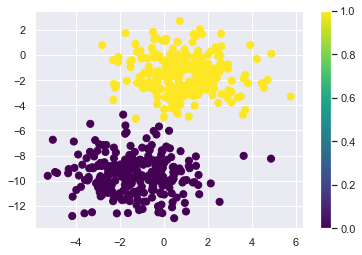

In [23]:
#creating a binary classification data and plotting it
from sklearn.datasets import make_blobs
X, y = make_blobs(500, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');
plt.colorbar()

One extremely fast way to create a simple model is to assume that the data is
described by a Gaussian distribution with no covariance between dimensions. We can
fit this model by simply finding the mean and standard deviation of the points within
each label, which is all you need to define such a distribution.

The ellipses here represent the Gaussian generative model for each label, with larger
probability toward the center of the ellipses. With this generative model in place for
each class, we have a simple recipe to compute the likelihood P(features|L1) for any
data point, and thus we can quickly compute the posterior ratio and determine which
label is the most probable for a given point.


<b>Guassian Naive Bayes

In [24]:
#Using sklearn implementaion of Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X,y)

GaussianNB()

In [25]:
#Seperating independent and dependent variables for test set
X_new, y_new = make_blobs(50, 2, centers=2, random_state=13, cluster_std=1.5)
#making predictions
y_pred=gnb.predict(X_new)
gnb.score(X_new,y_new)

0.56

In [27]:
#predict_proba gives probability for each class
gnb.predict_proba(X_new)


array([[2.32820976e-23, 1.00000000e+00],
       [2.99547857e-01, 7.00452143e-01],
       [3.33674240e-03, 9.96663258e-01],
       [5.79445264e-03, 9.94205547e-01],
       [1.65349051e-23, 1.00000000e+00],
       [1.54718895e-03, 9.98452811e-01],
       [3.95453853e-23, 1.00000000e+00],
       [1.91035079e-02, 9.80896492e-01],
       [5.17877905e-22, 1.00000000e+00],
       [1.59348296e-25, 1.00000000e+00],
       [1.54861468e-05, 9.99984514e-01],
       [5.27840312e-25, 1.00000000e+00],
       [3.27692385e-25, 1.00000000e+00],
       [9.00986974e-24, 1.00000000e+00],
       [1.74716493e-22, 1.00000000e+00],
       [2.58638189e-04, 9.99741362e-01],
       [1.84955983e-25, 1.00000000e+00],
       [3.27153405e-23, 1.00000000e+00],
       [1.09195532e-02, 9.89080447e-01],
       [7.63920756e-26, 1.00000000e+00],
       [1.47103653e-07, 9.99999853e-01],
       [1.02853179e-01, 8.97146821e-01],
       [9.41874788e-29, 1.00000000e+00],
       [3.51236978e-22, 1.00000000e+00],
       [2.118208

<b> Multinomial Naive Bayes

multinomial naive Bayes, where the features are assumed to be generated
from a simple multinomial distribution. The multinomial distribution describes the
probability of observing counts among a number of categories, and thus multinomial
naive Bayes is most appropriate for features that represent counts or count rates.

<b>Example: Classifying text

In [29]:
#importing the data
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [14]:
#seperating training and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,random_state=0)
#sample from train set
print(X_train[5])

From: worsham@aer.com. (Robert D. Worsham)
Subject: Tektronix Equipment: Color Terminal, Printer, Rasterizer & Supplies
Summary: Tektronix Equipment/Supplies for sale
Keywords: color, printer, terminal, rasterizer, tektronix
Organization: Atmospheric & Environmental Research, Inc.
Lines: 27

  For Sale:

      Tektronix 4208 Color Terminal
      Tektronix 4510A Rasterizer
      Tektronix 4692 InkJet Printer

      Tektronix 4692 Printer Extras (all Tektronix products):

        Paper (> 3 boxes)
        Transparencies (> 2 boxes)
        Maintenance Cartridges (2 cart)
        Magenta Ink Cartridge (1 cart)

  We would like to sell as a single lot, and preference
  will be given to offers for the entire list.  All offers
  accepted, best offer gets the equipment.

  -- Bob

  ____________________________________________________________________
  Robert D. Worsham  (Bob)                   | email:  worsham@aer.com
  Atmospheric & Environmental Research Inc.  | voice:  (617) 547-6207
  8

In [37]:
#importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [38]:
#creating pipeline and model fitting
model = make_pipeline(TfidfVectorizer(), MultinomialNB(alpha=100))
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

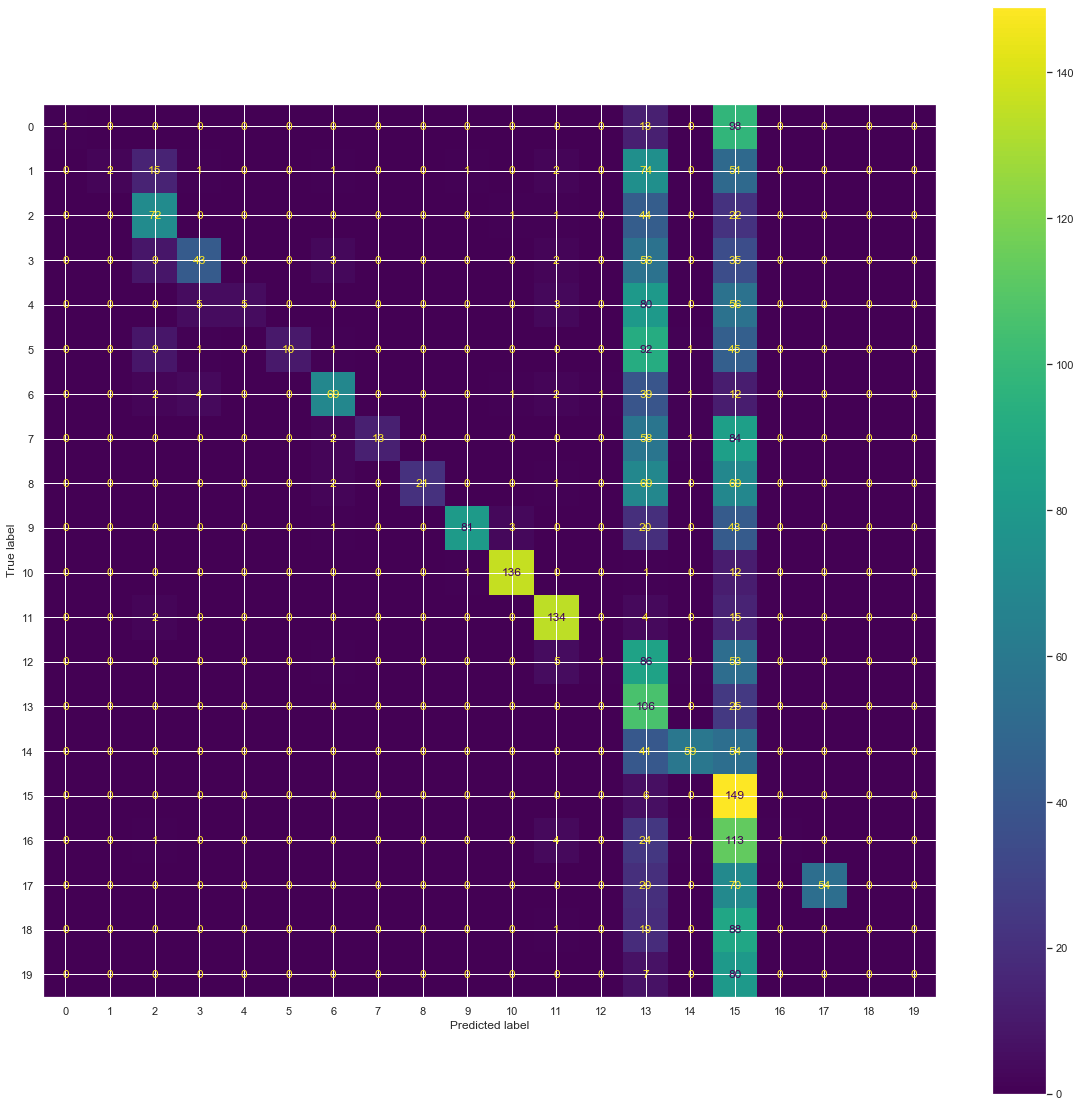

In [39]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(20, 20))
plot_confusion_matrix(model,X_test,y_test,ax=ax)

In [40]:
def predict_category(s, train=X_train, model=model):
 pred = model.predict([s])
 print(pred)
 return data.target_names[pred[0]]
predict_category("sending a payload to the ISS")

[13]


'sci.med'

<b>Categorical Naive Bayes<br/></b><br/>
    Naive Bayes classifier for categorical features<br/>

The categorical Naive Bayes classifier is suitable for classification with discrete features that are categorically distributed. The categories of each feature are drawn from a categorical distribution.

In [7]:
from sklearn.naive_bayes import CategoricalNB
import pandas as pd
data=pd.read_excel(r"C:\Users\Ishan\Documents\Python Scripts\Datasets\COVID-19.xlsx")
#to only have categorical features
data=data.drop(["body temperature","age","Sno"],axis=1)
data

,gender,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,travel history to infected countries,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell,Corona result
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,2
4,1,0,1,0,1,0,0,1,0,0,1,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0
123,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1
124,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1
125,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data.iloc[:,-1],random_state=0,test_size=0.2)
X_train

,gender,Dry Cough,sour throat,weakness,breathing problem,drowsiness,pain in chest,travel history to infected countries,diabetes,heart disease,lung disease,stroke or reduced immunity,symptoms progressed,high blood pressue,kidney disease,change in appetide,Loss of sense of smell
124,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1
13,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
33,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0
75,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,1,0
26,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0
64,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1
117,1,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0
47,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0


In [19]:
cnd=CategoricalNB(alpha=1)
cnd.fit(X_train,y_train)
cnd.score(X_test,y_test)

0.6153846153846154

The smoothing priors alpha>=0  accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting  <b>alpha =1 is called Laplace smoothing</b>, while <b>alpha<1 is called Lidstone smoothing.

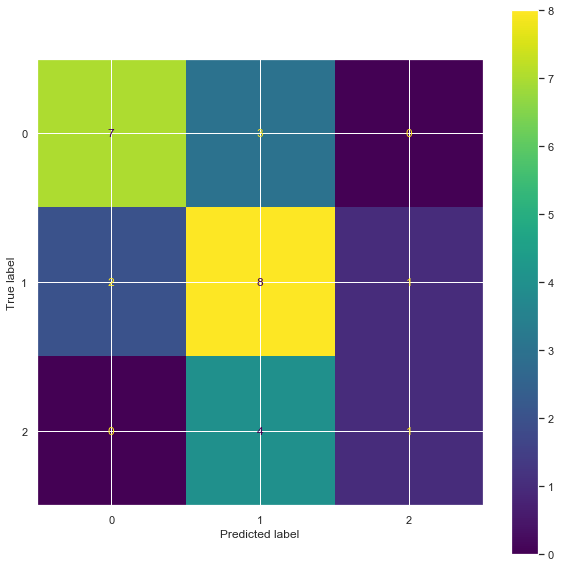

In [23]:
#plotting confusion matrix
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(cnd,X_test,y_test,ax=ax)

# When to Use Naive Bayes?

Generally this algorithm doesnt perform really good with real world data.But it does have some great advantages:<br/>
<br/>

- They are extremely fast for both training and prediction<br/>
- They provide straightforward probabilistic prediction<br/>

- They are often very easily interpretable<br/>
- They have very few (if any) tunable parameters<br/>


Naive Bayes classifiers tend to perform especially well in one of the following
situations:<br/><br/>
• When the naive assumptions actually match the data (very rare in practice)<br/>
• For very well-separated categories, when model complexity is less important<br/>
• For very high-dimensional data, when model complexity is less important<br/>

# Computaional Complexity

The computational efficiency of Naive Bayes lies in the fact that the runtime<br/>
complexity of Naive Bayes classifier is O(nK), where n is the number of features and K is the number of label classes.

<b>Great Explanation of this algorithm is given on :<br/>
- https://software.intel.com/content/www/us/en/develop/articles/mathematical-concepts-and-principles-of-naive-bayes.html#:~:text=Mathematics%20Behind%20Naive%20Bayes&text=P(c)%3A%20is%20the,true%2C%20provided%20x%20is%20true.<br/>
- https://shuzhanfan.github.io/2018/06/understanding-mathematics-behind-naive-bayes/